In [1]:
#import required basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# EDA

In [2]:
#Load the dataset
books = pd.read_csv("books.csv",encoding='latin-1')
print(books.head())


         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/

In [3]:
ratings= pd.read_csv("ratings.csv",encoding='latin-1')
print(ratings.head())

   User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6


In [4]:
users = pd.read_csv("users.csv",encoding='latin-1')
print(users.head())

   User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN


In [5]:
#identifying missing values
print(books.isnull().sum())
books.shape
print(f'Total shape of table book is: {books.shape}')

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
Total shape of table book is: (271360, 8)


In [6]:
# Find rows with null values
null_rows = books[books.isnull().any(axis=1)]
print("\nRows with null values:")
print(null_rows)


Rows with null values:
              ISBN                                         Book-Title  \
128890  193169656X                                        Tyrant Moon   
129037  1931696993                                    Finders Keepers   
187689  9627982032  The Credit Suisse Guide to Managing Your Perso...   
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

            Book-Author Year-Of-Publication  \
128890  Elaine Corvidae                2002   
129037  Linnea Sinclair                2001   
187689              NaN                1995   
209538             2000   DK Publishing Inc   
220731             2003           Gallimard   
221678             2000   DK Publishing Inc   

                                                Publisher  \
128890                                                NaN   
129037      

In [7]:
print(ratings.isnull().sum())
print(f'Total shape of table ratings is: {ratings.shape}')

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
Total shape of table ratings is: (1149780, 3)


In [8]:
print(users.isnull().sum())
print(f'Total shape of table userss is : {users.shape}')

User-ID          0
Location         0
Age         110762
dtype: int64
Total shape of table userss is : (278858, 3)


In [9]:
# Disply rows with null values
null_rows1 = users[users.isnull().any(axis=1)]
print("\nRows with null values:")
print(null_rows1)


Rows with null values:
        User-ID                            Location  Age
0             1                  nyc, new york, usa  NaN
2             3     moscow, yukon territory, russia  NaN
4             5  farnborough, hants, united kingdom  NaN
6             7                 washington, dc, usa  NaN
7             8            timmins, ontario, canada  NaN
...         ...                                 ...  ...
278849   278850          sergnano, lombardia, italy  NaN
278853   278854               portland, oregon, usa  NaN
278855   278856           brampton, ontario, canada  NaN
278856   278857           knoxville, tennessee, usa  NaN
278857   278858                dublin, n/a, ireland  NaN

[110762 rows x 3 columns]


In [10]:
len(users)

278858

In [11]:
users['Age'].isnull().sum()

110762

In [12]:
#Identifying % of Columns null values 

null_count_col =users.isnull().sum().value_counts(ascending= False)

null_percent_col = (((users.isnull().sum()) / (len(users))) * 100).value_counts(ascending= False)

In [13]:
print("Null count for Columns: \n\n",null_count_col, "\n")
print("Null percentage for Columns :\n", null_percent_col)

Null count for Columns: 

 0         2
110762    1
dtype: int64 

Null percentage for Columns :
 0.000000     2
39.719857    1
dtype: int64


In [14]:
missing_value_percentage= round(users.isnull().mean().mul(100),2)
missing_value_percentage

User-ID      0.00
Location     0.00
Age         39.72
dtype: float64

In [15]:
#Dealing with missing values
books['Book-Author']= books['Book-Author'].fillna('None')
books['Publisher']= books['Publisher'].fillna('None')
books['Image-URL-L']= books['Image-URL-L'].fillna('None')
print(books.isnull().sum())
print(f'Total shape of table book is: {books.shape}')
print(books.dtypes)

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64
Total shape of table book is: (271360, 8)
ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


In [16]:
#Null values replacing with median of 'Age' column
users = users.fillna(users.median())

In [17]:
print(users.isnull().sum())
print(f'Total shape of table userss is : {users.shape}')

User-ID     0
Location    0
Age         0
dtype: int64
Total shape of table userss is : (278858, 3)


In [18]:
#Duplicates
books.duplicated().sum()

0

In [19]:
ratings.duplicated().sum()

0

In [20]:
users.duplicated().sum()

0

In [21]:
#Merging Tables based on common columns
db1=pd.merge(books, ratings, on='ISBN', how='inner')
db1.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [22]:
data=pd.merge(db1,users, on ='User-ID', how ='inner')

In [23]:
data.shape

(1031136, 12)

In [24]:
data.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
Location               0
Age                    0
dtype: int64

In [25]:
data.duplicated().sum()

0

In [26]:
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",32.0
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",32.0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",32.0
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",32.0


In [27]:
data.describe()

,User-ID,Book-Rating,Age
count,1.031136e+06,1.031136e+06,1.031136e+06
mean,1.405945e+05,2.839051e+00,3.594328e+01
std,8.052466e+04,3.854157e+00,1.228579e+01
min,2.000000e+00,0.000000e+00,0.000000e+00
25%,7.041500e+04,0.000000e+00,3.100000e+01
50%,1.412100e+05,0.000000e+00,3.200000e+01
75%,2.114260e+05,7.000000e+00,4.100000e+01
max,2.788540e+05,1.000000e+01,2.440000e+02


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031136 non-null  object 
 3   Year-Of-Publication  1031136 non-null  object 
 4   Publisher            1031136 non-null  object 
 5   Image-URL-S          1031136 non-null  object 
 6   Image-URL-M          1031136 non-null  object 
 7   Image-URL-L          1031136 non-null  object 
 8   User-ID              1031136 non-null  int64  
 9   Book-Rating          1031136 non-null  int64  
 10  Location             1031136 non-null  object 
 11  Age                  1031136 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 102.3+ MB


In [29]:
# Sort the dataset by rating in descending order and select the top 20 books
top_20_books = data.sort_values(by='Book-Rating', ascending=False).head(20)

# Display the top 20 books
print(top_20_books['Book-Title'])

158414                              The Adrian Mole Diaries
688948                    Roses Are Red (Alex Cross Novels)
200432            Seven Little Postmen (Little Golden Book)
539911    Collected Poems: Edited by Frank Bidart and Da...
731866                                        Cryptonomicon
200433                 The Truck Book (Best Book Club Ever)
835040                        One Hundred Years of Solitude
200434                                     Rehearsal's Off!
228630                                        Kill Me Again
560933                        Complete Chronicles of Narnia
305355    The Bad Beginning (A Series of Unfortunate Eve...
688949                                  1st to Die: A Novel
938631                     The Last Time They Met : A Novel
200437    The Salmon of Doubt: Hitchhiking the Galaxy On...
873771                                         Black Friday
582683                            James and the Giant Peach
539912    Unholy Wars : Afghanistan, Ame

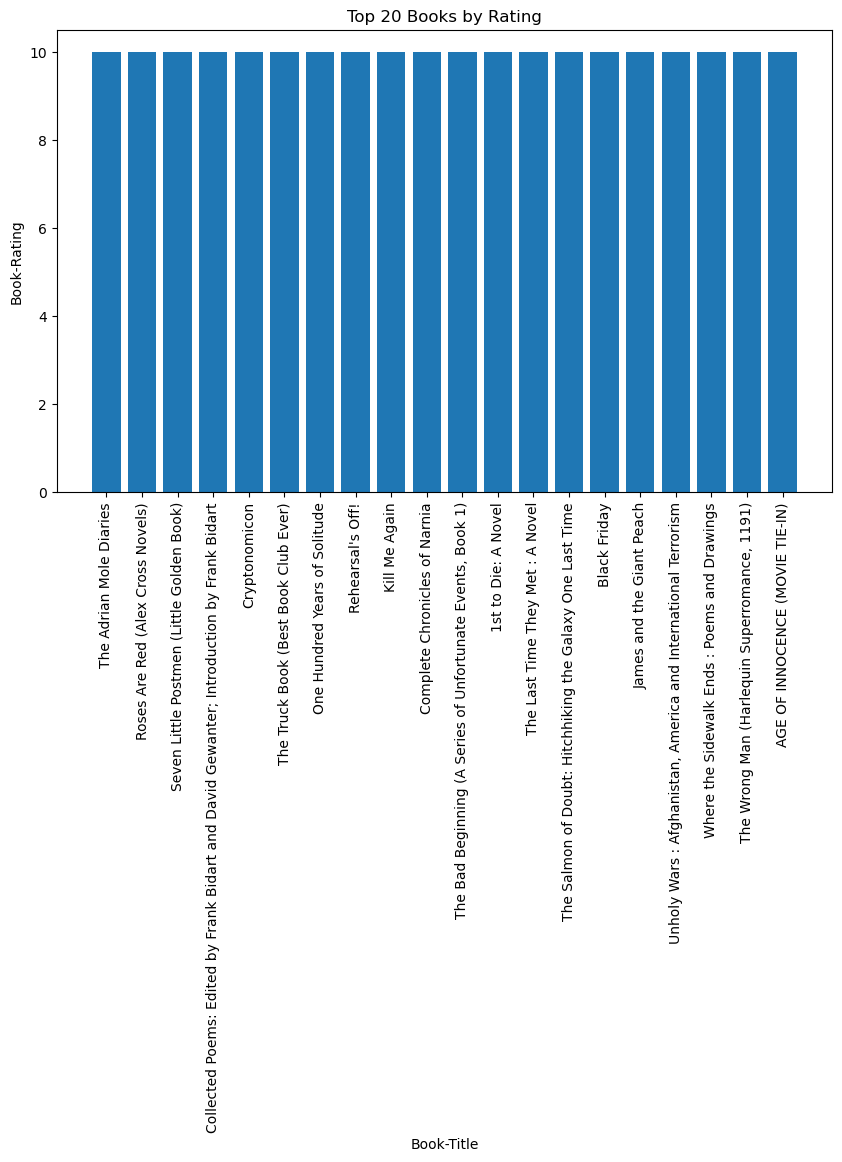

In [30]:
#Top 20 Books by Rating - plot
plt.figure(figsize=(10, 6))
plt.bar(top_20_books['Book-Title'], top_20_books['Book-Rating'])
plt.xlabel('Book-Title')
plt.ylabel('Book-Rating')
plt.title('Top 20 Books by Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [31]:
# Group data by user and count the number of books each user has read
user_book_count = data.groupby('User-ID').size().reset_index(name='Book-Title')

In [32]:
# Sort users based on the number of books read in descending order
top_100_users = user_book_count.sort_values(by='Book-Title', ascending=False).head(100)

In [33]:
print(top_100_users)

       User-ID  Book-Title
3629     11676       11144
65332   198711        6456
50848   153662        5814
32581    98391        5779
11848    35859        5646
...        ...         ...
77393   234828        1084
11847    35857        1081
74150   225087        1063
51621   156150        1059
35647   107784        1052

[100 rows x 2 columns]


In [34]:
data.dtypes

ISBN                    object
Book-Title              object
Book-Author             object
Year-Of-Publication     object
Publisher               object
Image-URL-S             object
Image-URL-M             object
Image-URL-L             object
User-ID                  int64
Book-Rating              int64
Location                object
Age                    float64
dtype: object

# Book-Rating

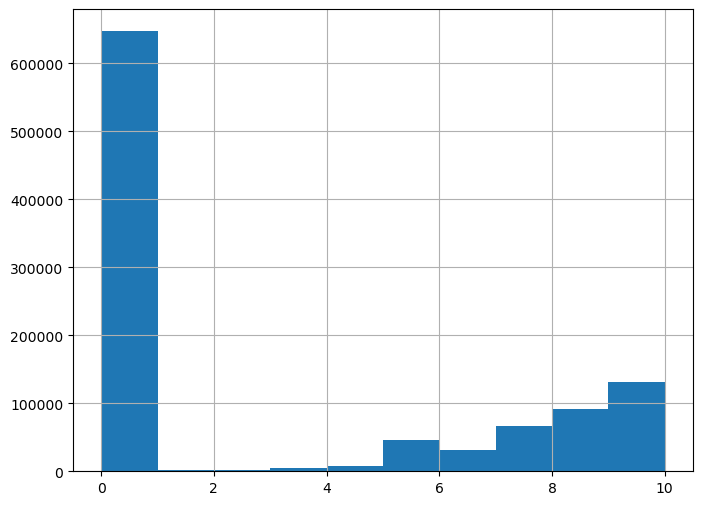

Shape of all merged Columns : (1031136, 12)


In [35]:
data['Book-Rating'].hist(figsize=(8,6))
plt.show()
print(f"Shape of all merged Columns : {data.shape}")

In [36]:
# Count the ratings
implicit_count = (data['Book-Rating'] == 0).sum()
explicit_count = (data['Book-Rating'] > 0).sum()

In [37]:
counts_rating = pd.DataFrame(
    {
    'Rating_Type': ['implicit', 'explicit'],
    'Count': [implicit_count, explicit_count]
    })

In [38]:
print(counts_rating)

  Rating_Type   Count
0    implicit  647294
1    explicit  383842


In [39]:
#Filter the DataFrame to include only ratings from 1 to 10
explicit_rating = data[(data['Book-Rating'] > 0) & (data['Book-Rating'] <= 10)]
explicit_rating


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",32.0
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,8,5,"timmins, ontario, canada",32.0
12,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,8,5,"timmins, ontario, canada",32.0
13,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,8,5,"timmins, ontario, canada",32.0
15,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.0...,http://images.amazon.com/images/P/1567407781.0...,http://images.amazon.com/images/P/1567407781.0...,8,6,"timmins, ontario, canada",32.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1031129,8441407487,Sobre La Utilidad y Los Perjuicios de La Historia,Friedrich Wilhelm Nietzsche,2000,Edaf,http://images.amazon.com/images/P/8441407487.0...,http://images.amazon.com/images/P/8441407487.0...,http://images.amazon.com/images/P/8441407487.0...,246590,6,"madrid, madrid, spain",20.0
1031131,087004124X,Anthem,Ayn Rand,1966,Caxton Press,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,259589,8,"venice, florida, usa",19.0
1031132,158243123X,A Student of Weather,Elizabeth Hay,2001,Counterpoint Press,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,259591,8,"tioga, pennsylvania, usa",39.0
1031133,8485900057,Rimas y leyendas (Clásicos Fraile ; 3),Gustavo Adolfo Bécquer,1981,Ediciones Fraile,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,259614,10,"madrid, madrid, spain",22.0


In [40]:
# Select only the 'Book-Rating' column
book_rating = explicit_rating['Book-Rating']

In [41]:
book_rating

1           5
9           5
12          5
13          5
15          6
           ..
1031129     6
1031131     8
1031132     8
1031133    10
1031134     6
Name: Book-Rating, Length: 383842, dtype: int64

In [42]:
book_rating.describe()

count    383842.000000
mean          7.626701
std           1.841339
min           1.000000
25%           7.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: Book-Rating, dtype: float64

In [43]:
book_rating.shape

(383842,)

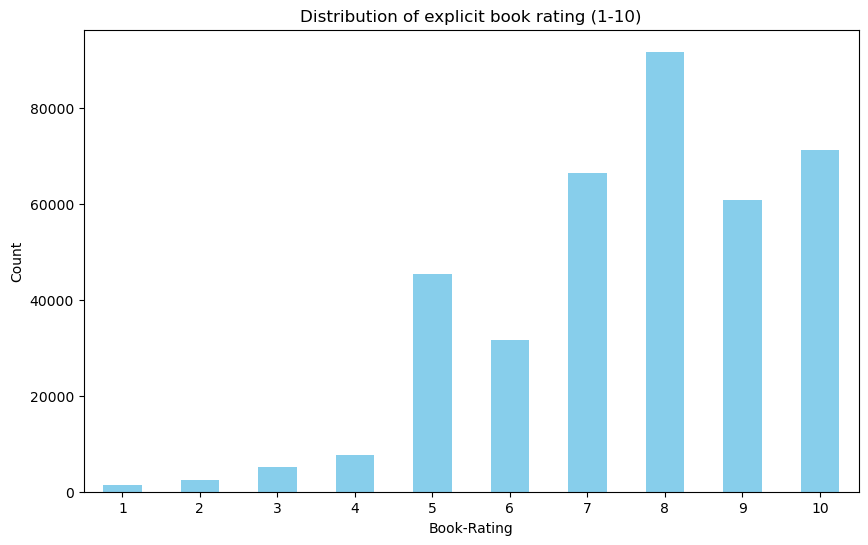

In [44]:
# Plot the distribution of ratings from 1 to 10
plt.figure(figsize=(10, 6))
explicit_rating['Book-Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Book-Rating')
plt.ylabel('Count')
plt.title('Distribution of explicit book rating (1-10)')
plt.xticks(rotation=0)
plt.show()

# Year-Of-Publication

In [45]:
# Changing the datatype from object to int
data['Year-Of-Publication'] = pd.to_numeric(data['Year-Of-Publication'], errors='coerce')

print(data.dtypes)

ISBN                    object
Book-Title              object
Book-Author             object
Year-Of-Publication    float64
Publisher               object
Image-URL-S             object
Image-URL-M             object
Image-URL-L             object
User-ID                  int64
Book-Rating              int64
Location                object
Age                    float64
dtype: object


In [46]:
np.sort(data['Year-Of-Publication'].unique())

array([   0., 1376., 1378., 1806., 1897., 1900., 1901., 1902., 1904.,
       1906., 1908., 1909., 1910., 1911., 1914., 1917., 1919., 1920.,
       1921., 1922., 1923., 1924., 1925., 1926., 1927., 1928., 1929.,
       1930., 1931., 1932., 1933., 1934., 1935., 1936., 1937., 1938.,
       1939., 1940., 1941., 1942., 1943., 1944., 1945., 1946., 1947.,
       1948., 1949., 1950., 1951., 1952., 1953., 1954., 1955., 1956.,
       1957., 1958., 1959., 1960., 1961., 1962., 1963., 1964., 1965.,
       1966., 1967., 1968., 1969., 1970., 1971., 1972., 1973., 1974.,
       1975., 1976., 1977., 1978., 1979., 1980., 1981., 1982., 1983.,
       1984., 1985., 1986., 1987., 1988., 1989., 1990., 1991., 1992.,
       1993., 1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001.,
       2002., 2003., 2004., 2005., 2006., 2008., 2010., 2011., 2012.,
       2020., 2021., 2024., 2026., 2030., 2037., 2038., 2050.,   nan])

In [47]:
# Ensure matplotlib plots 
%matplotlib inline

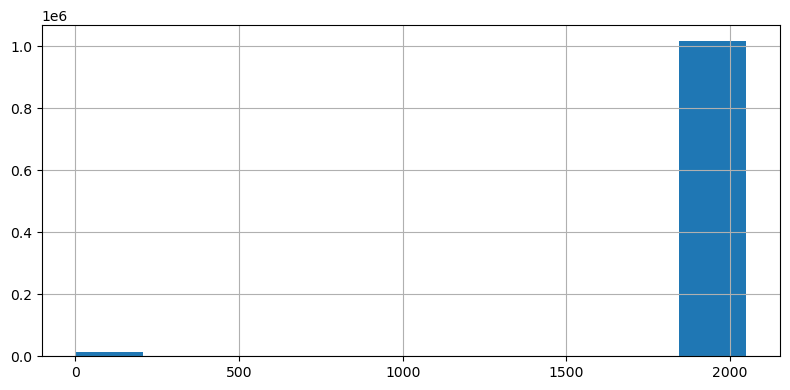

In [48]:
data["Year-Of-Publication"].hist(figsize=(8,4))
plt.tight_layout()
plt.show()

In [49]:
# Check for entries below 1900 or above 2024
outliers = data[(data['Year-Of-Publication'] < 1900) | (data['Year-Of-Publication'] > 2024)]

print("Entries below 1900 or above 2024:")
print(outliers)

Entries below 1900 or above 2024:
               ISBN                           Book-Title          Book-Author  \
184      0571197639          Poisonwood Bible Edition Uk   Barbara Kingsolver   
289      0590021117          Little House On the Prairie  Laura Ingall Wilder   
318      2070362388                               Ravage        Rene Barjavel   
319      2266033689                   Le Diable Au Corps     Raymond Radiguet   
345      0718144538                         Shattered Uk         Dick Francis   
...             ...                                  ...                  ...   
1030997  2070382761  Monsieur Vous Oubliez Votre Cadavre         Pascal Laine   
1031008  8807840146                                 Next              Baricco   
1031036  0670867136               Bruno and the Crumhorn    Ursula Dubosarsky   
1031095  3442075750                          Effi Briest              Fontane   
1031105  0713715200            American Filmmakers Today           Dian Smi

In [50]:
outliers["Year-Of-Publication"].unique()

array([   0., 2030., 1897., 2038., 2026., 2050., 1806., 1378., 2037.,
       1376.])

In [51]:
#getting output in ascending order
np.sort(outliers["Year-Of-Publication"].unique())

array([   0., 1376., 1378., 1806., 1897., 2026., 2030., 2037., 2038.,
       2050.])

In [52]:
#Now removing outliers & then need to plot histogram for Year of publication > 1900 & < 2024
df_filtered_year = data[(data["Year-Of-Publication"] >= 1900 ) & (data["Year-Of-Publication"]<=2024)]
df_filtered_year

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",32.0
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",32.0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",32.0
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",32.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,087004124X,Anthem,Ayn Rand,1966.0,Caxton Press,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,259589,8,"venice, florida, usa",19.0
1031132,158243123X,A Student of Weather,Elizabeth Hay,2001.0,Counterpoint Press,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,259591,8,"tioga, pennsylvania, usa",39.0
1031133,8485900057,Rimas y leyendas (Clásicos Fraile ; 3),Gustavo Adolfo Bécquer,1981.0,Ediciones Fraile,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,259614,10,"madrid, madrid, spain",22.0
1031134,0838934854,Anglo-American Cataloguing Rules,Michael Gorman,1998.0,American Library Association,http://images.amazon.com/images/P/0838934854.0...,http://images.amazon.com/images/P/0838934854.0...,http://images.amazon.com/images/P/0838934854.0...,259679,6,"grand prairie, texas, usa",27.0


In [53]:
## Select only the 'Year-Of-Publication' column
year_of_publication = df_filtered_year["Year-Of-Publication"]

In [54]:
year_of_publication

0          2002.0
1          2001.0
2          1991.0
3          1999.0
4          1999.0
            ...  
1031131    1966.0
1031132    2001.0
1031133    1981.0
1031134    1998.0
1031135    2003.0
Name: Year-Of-Publication, Length: 1017066, dtype: float64

In [55]:
year_of_publication.describe()

count    1.017066e+06
mean     1.995303e+03
std      7.304355e+00
min      1.900000e+03
25%      1.992000e+03
50%      1.997000e+03
75%      2.001000e+03
max      2.024000e+03
Name: Year-Of-Publication, dtype: float64

In [56]:
year_of_publication.shape

(1017066,)

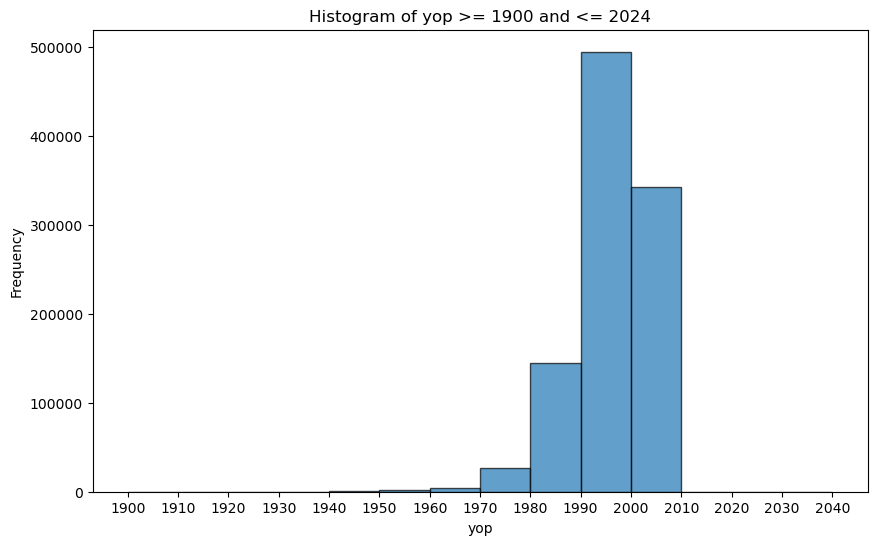

In [57]:
# Plot histogram for the filtered years
plt.figure(figsize=(10, 6))
plt.hist(df_filtered_year["Year-Of-Publication"], bins=range(1900, 2050, 10), edgecolor='black', alpha=0.7)
plt.xlabel('yop')
plt.ylabel('Frequency')
plt.title('Histogram of yop >= 1900 and <= 2024')
plt.xticks(range(1900, 2050, 10))
plt.grid(False)
plt.show()

In [58]:
unique_yop = df_filtered_year["Year-Of-Publication"].unique()

In [59]:
# Display the unique values
print("Unique yop between 1900 and 2024:")
print(unique_yop)

Unique yop between 1900 and 2024:
[2002. 2001. 1991. 1999. 2000. 1993. 1996. 1988. 2004. 1998. 1994. 2003.
 1992. 1989. 1976. 1985. 1980. 1995. 1997. 1983. 1987. 1990. 1982. 1965.
 1986. 1960. 1974. 1978. 1984. 1973. 1959. 1942. 1979. 1972. 1981. 1957.
 1971. 1963. 1958. 1966. 1930. 1969. 1953. 1970. 1947. 1977. 1954. 1920.
 1955. 1975. 1964. 1967. 2005. 1951. 1927. 1961. 1968. 1962. 1948. 1925.
 1923. 1938. 1956. 1901. 1926. 1940. 1941. 1922. 1949. 1939. 1952. 1933.
 1944. 2011. 1937. 1902. 1950. 1911. 1943. 1945. 1946. 1932. 1924. 1921.
 1936. 2021. 1900. 1929. 2020. 2006. 1909. 2010. 1931. 1906. 1935. 1928.
 1934. 1910. 2012. 2008. 1917. 1914. 1904. 2024. 1908. 1919.]


In [60]:
#sorting in ascending order for checking
np.sort(unique_yop)

array([1900., 1901., 1902., 1904., 1906., 1908., 1909., 1910., 1911.,
       1914., 1917., 1919., 1920., 1921., 1922., 1923., 1924., 1925.,
       1926., 1927., 1928., 1929., 1930., 1931., 1932., 1933., 1934.,
       1935., 1936., 1937., 1938., 1939., 1940., 1941., 1942., 1943.,
       1944., 1945., 1946., 1947., 1948., 1949., 1950., 1951., 1952.,
       1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960., 1961.,
       1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969., 1970.,
       1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978., 1979.,
       1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2008., 2010., 2011., 2012., 2020., 2021., 2024.])

# Age

In [61]:
print(data["Age"])

0          18.0
1          32.0
2          32.0
3          32.0
4          32.0
           ... 
1031131    19.0
1031132    39.0
1031133    22.0
1031134    27.0
1031135    32.0
Name: Age, Length: 1031136, dtype: float64


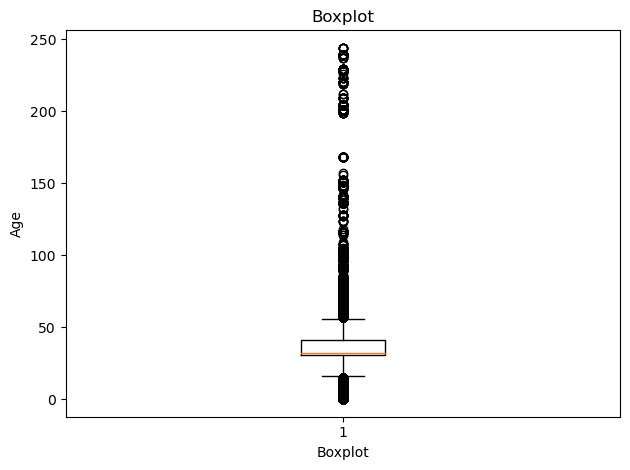

In [62]:
plt.boxplot(data['Age'],vert =True)
plt.ylabel("Age")
plt.xlabel("Boxplot")
plt.title("Boxplot")
plt.tight_layout();

In [63]:
# Check for entries below Age 5 or above 100
outliers = data[(data['Age'] < 5) | (data['Age'] > 100)]

print("Entries below Age 5 or above 100:")
print(outliers)

Entries below Age 5 or above 100:
               ISBN                                         Book-Title  \
118537   0440234743                                      The Testament   
118538   0971880107                                        Wild Animus   
118539   042511774X                                  Breathing Lessons   
118540   0316769487                             The Catcher in the Rye   
118541   0786868716                 The Five People You Meet in Heaven   
...             ...                                                ...   
1030184  3857913347                        Londons letzter Gast: Roman   
1030210  3446199799                               Ein Haus in Istrien.   
1030252  1885331096  The Confidence Factor: Cosmic Gooses Lay Golde...   
1030531  8440639228                          El Principe de Las Mareas   
1030648  3423124504                                 Der Engel schwieg.   

            Book-Author  Year-Of-Publication                 Publisher  \
118

In [64]:
outliers["Age"].unique()

array([116., 128., 104.,   0., 239., 103., 201., 204.,   2.,   3.,   1.,
         4., 151., 148., 209., 147., 101., 168., 152., 133., 136., 228.,
       141., 237., 108., 146., 140., 223., 219., 124., 200., 220., 244.,
       212., 157., 229., 105., 199., 226., 123., 118., 127., 114., 156.,
       138., 109., 132., 107.])

In [65]:
#getting output in ascending order
np.sort(outliers["Age"].unique())

array([  0.,   1.,   2.,   3.,   4., 101., 103., 104., 105., 107., 108.,
       109., 114., 116., 118., 123., 124., 127., 128., 132., 133., 136.,
       138., 140., 141., 146., 147., 148., 151., 152., 156., 157., 168.,
       199., 200., 201., 204., 209., 212., 219., 220., 223., 226., 228.,
       229., 237., 239., 244.])

In [66]:
#Now removing outliers we need to plot histogram for Age > 100 OR < 5
df_filtered_age = data[(data["Age"] >= 5 ) & (data["Age"]<= 100)]
df_filtered_age

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",32.0
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",32.0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",32.0
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",32.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,087004124X,Anthem,Ayn Rand,1966.0,Caxton Press,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,259589,8,"venice, florida, usa",19.0
1031132,158243123X,A Student of Weather,Elizabeth Hay,2001.0,Counterpoint Press,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,259591,8,"tioga, pennsylvania, usa",39.0
1031133,8485900057,Rimas y leyendas (Clásicos Fraile ; 3),Gustavo Adolfo Bécquer,1981.0,Ediciones Fraile,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,259614,10,"madrid, madrid, spain",22.0
1031134,0838934854,Anglo-American Cataloguing Rules,Michael Gorman,1998.0,American Library Association,http://images.amazon.com/images/P/0838934854.0...,http://images.amazon.com/images/P/0838934854.0...,http://images.amazon.com/images/P/0838934854.0...,259679,6,"grand prairie, texas, usa",27.0


In [67]:
age = df_filtered_age["Age"]

In [68]:
age

0          18.0
1          32.0
2          32.0
3          32.0
4          32.0
           ... 
1031131    19.0
1031132    39.0
1031133    22.0
1031134    27.0
1031135    32.0
Name: Age, Length: 1026502, dtype: float64

In [69]:
age.describe()

count    1.026502e+06
mean     3.570127e+01
std      1.058934e+01
min      5.000000e+00
25%      3.100000e+01
50%      3.200000e+01
75%      4.100000e+01
max      1.000000e+02
Name: Age, dtype: float64

In [70]:
age.shape

(1026502,)

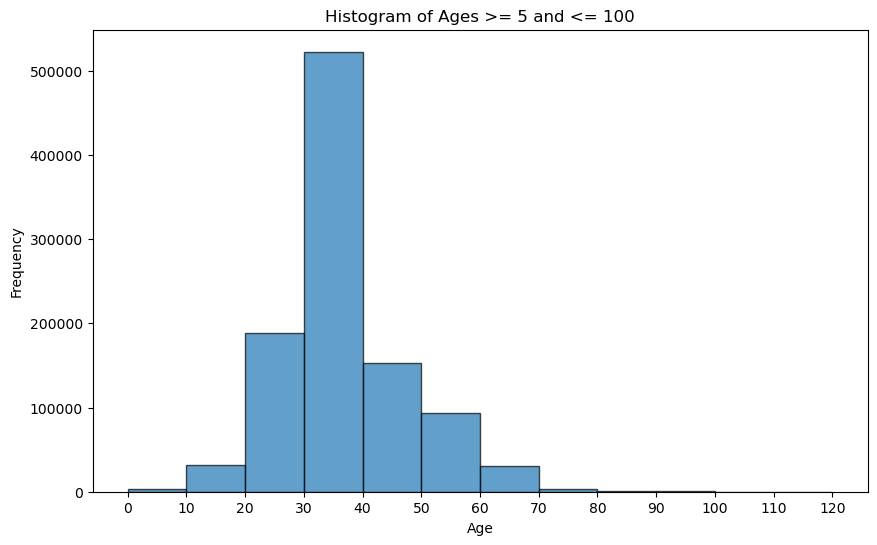

In [71]:
# Plot histogram for the filtered ages
plt.figure(figsize=(10, 6))
plt.hist(df_filtered_age["Age"], bins=range(0, 130, 10), edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Ages >= 5 and <= 100')
plt.xticks(range(0, 130, 10))  # Adjust the x-axis ticks for better readability
plt.grid(False)
plt.show()

In [72]:
unique_ages = df_filtered_age['Age'].unique()
# Display the unique values
print("Unique ages between 5 and 100:")
print(unique_ages)

Unique ages between 5 and 100:
[ 18.  32.  49.  30.  36.  29.  60.  27.  71.  40.  53.  65.  46.  47.
  26.  56.  37.  39.  25.  31.  41.  20.  58.  42.  38.  52.  21.  22.
  34.  33.  19.  57.  51.  48.  35.  62.  45.  74.  44.  43.  68.  54.
  55.  24.  59.  28.  70.  17.  23.  14.  50.  16.  61.  15.  66.  67.
  84.  82.   9.  72.  81.  64.  13.  75.  76.  69.  73.  63.  77.  79.
   7.  12.  90.  80.  85.  78.  83.   8. 100.  93.  11.  10.  97.   5.
  86.  99.  92.  96.  94.   6.  89.  95.  98.]


In [73]:
np.sort(unique_ages)

array([  5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
        16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,
        27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,
        38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,
        49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
        60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,
        71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,
        82.,  83.,  84.,  85.,  86.,  89.,  90.,  92.,  93.,  94.,  95.,
        96.,  97.,  98.,  99., 100.])

In [74]:
#To see my original data
print("Original DataFrame:")
data

Original DataFrame:


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",32.0
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",32.0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",32.0
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",32.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,087004124X,Anthem,Ayn Rand,1966.0,Caxton Press,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,http://images.amazon.com/images/P/087004124X.0...,259589,8,"venice, florida, usa",19.0
1031132,158243123X,A Student of Weather,Elizabeth Hay,2001.0,Counterpoint Press,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,http://images.amazon.com/images/P/158243123X.0...,259591,8,"tioga, pennsylvania, usa",39.0
1031133,8485900057,Rimas y leyendas (Clásicos Fraile ; 3),Gustavo Adolfo Bécquer,1981.0,Ediciones Fraile,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,http://images.amazon.com/images/P/8485900057.0...,259614,10,"madrid, madrid, spain",22.0
1031134,0838934854,Anglo-American Cataloguing Rules,Michael Gorman,1998.0,American Library Association,http://images.amazon.com/images/P/0838934854.0...,http://images.amazon.com/images/P/0838934854.0...,http://images.amazon.com/images/P/0838934854.0...,259679,6,"grand prairie, texas, usa",27.0


In [75]:
data.describe()

,Year-Of-Publication,User-ID,Book-Rating,Age
count,1.031132e+06,1.031136e+06,1.031136e+06,1.031136e+06
mean,1.968195e+03,1.405945e+05,2.839051e+00,3.594328e+01
std,2.311015e+02,8.052466e+04,3.854157e+00,1.228579e+01
min,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
25%,1.992000e+03,7.041500e+04,0.000000e+00,3.100000e+01
50%,1.997000e+03,1.412100e+05,0.000000e+00,3.200000e+01
75%,2.001000e+03,2.114260e+05,7.000000e+00,4.100000e+01
max,2.050000e+03,2.788540e+05,1.000000e+01,2.440000e+02


In [76]:
data.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating',
       'Location', 'Age'],
      dtype='object')

In [77]:
explicit_rating.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating',
       'Location', 'Age'],
      dtype='object')

In [78]:
df_filtered_year.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating',
       'Location', 'Age'],
      dtype='object')

In [79]:
df_filtered_age.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating',
       'Location', 'Age'],
      dtype='object')

In [80]:
# Removing all columns except 'Book-Title' & 'Year-Of-Publication' in df_filtered_year
df_filtered_year = df_filtered_year[['Book-Title', 'Year-Of-Publication']]
# Display the modified dataframes
print("df_filtered_year:")
print(df_filtered_year)

df_filtered_year:
                                                Book-Title  \
0                                      Classical Mythology   
1                                             Clara Callan   
2                                     Decision in Normandy   
3        Flu: The Story of the Great Influenza Pandemic...   
4                                   The Mummies of Urumchi   
...                                                    ...   
1031131                                             Anthem   
1031132                               A Student of Weather   
1031133             Rimas y leyendas (Clásicos Fraile ; 3)   
1031134                   Anglo-American Cataloguing Rules   
1031135                                   Texte zur Ethik.   

         Year-Of-Publication  
0                     2002.0  
1                     2001.0  
2                     1991.0  
3                     1999.0  
4                     1999.0  
...                      ...  
1031131             

In [81]:
# Removing all columns except 'Book-Title' & 'Book-Rating' in explicit_rating
explicit_rating = explicit_rating[['Book-Title', 'Book-Rating']]
print("\nexplicit_rating:")
print(explicit_rating)


explicit_rating:
                                                Book-Title  Book-Rating
1                                             Clara Callan            5
9                  Where You'll Find Me: And Other Stories            5
12                                      The Middle Stories            5
13                                                Jane Doe            5
15            The Witchfinder (Amos Walker Mystery Series)            6
...                                                    ...          ...
1031129  Sobre La Utilidad y Los Perjuicios de La Historia            6
1031131                                             Anthem            8
1031132                               A Student of Weather            8
1031133             Rimas y leyendas (Clásicos Fraile ; 3)           10
1031134                   Anglo-American Cataloguing Rules            6

[383842 rows x 2 columns]


In [82]:
# Removing all columns except 'Book-Title' & 'Age' in df_filtered_age
df_filtered_age = df_filtered_age[['Book-Title', 'Age']]
print("\ndf_filtered_age:")
print(df_filtered_age)


df_filtered_age:
                                                Book-Title   Age
0                                      Classical Mythology  18.0
1                                             Clara Callan  32.0
2                                     Decision in Normandy  32.0
3        Flu: The Story of the Great Influenza Pandemic...  32.0
4                                   The Mummies of Urumchi  32.0
...                                                    ...   ...
1031131                                             Anthem  19.0
1031132                               A Student of Weather  39.0
1031133             Rimas y leyendas (Clásicos Fraile ; 3)  22.0
1031134                   Anglo-American Cataloguing Rules  27.0
1031135                                   Texte zur Ethik.  32.0

[1026502 rows x 2 columns]


In [83]:
#MemoryError: Unable to allocate 97.6 GiB for an array with shape (13096467644,) and data type int64 hence executing below steps

In [84]:
pip install dask

Note: you may need to restart the kernel to use updated packages.


In [85]:
import dask.dataframe as dd

In [86]:
#Convert a DataFrame to a CSV file using the to_csv() method in pandas
explicit_rating.to_csv('explicit_rating.csv', index=False)

In [87]:
#Similarly for df_filtered_year & df_filtered_age
df_filtered_year.to_csv('df_filtered_year.csv', index=False)


In [88]:
df_filtered_age.to_csv('df_filtered_age.csv', index=False)

In [89]:
explicit_rating = dd.read_csv('explicit_rating.csv')
df_filtered_year = dd.read_csv('df_filtered_year.csv')
df_filtered_age = dd.read_csv('df_filtered_age.csv')

In [90]:
data.describe()

,Year-Of-Publication,User-ID,Book-Rating,Age
count,1.031132e+06,1.031136e+06,1.031136e+06,1.031136e+06
mean,1.968195e+03,1.405945e+05,2.839051e+00,3.594328e+01
std,2.311015e+02,8.052466e+04,3.854157e+00,1.228579e+01
min,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
25%,1.992000e+03,7.041500e+04,0.000000e+00,3.100000e+01
50%,1.997000e+03,1.412100e+05,0.000000e+00,3.200000e+01
75%,2.001000e+03,2.114260e+05,7.000000e+00,4.100000e+01
max,2.050000e+03,2.788540e+05,1.000000e+01,2.440000e+02


In [91]:
df=data

In [92]:
#to find out top 20 'ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','User-ID', 'Book-Rating' 'Location' & 'Age' .

top_ISBN = df['ISBN'].value_counts().head(20)
print(f"Top 20 ISBN from merged dataset : \n\n{top_ISBN}")


Top 20 ISBN from merged dataset : 

0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
044023722X     647
0142001740     615
067976402X     614
0671027360     586
0446672211     585
059035342X     571
0316601950     568
0375727345     552
044021145X     529
0452282152     526
0440214041     523
0804106304     519
0440211727     517
0345337662     506
0060930535     494
Name: ISBN, dtype: int64


In [93]:
top_books = df['Book-Title'].value_counts().head(20)
print(f"Top 20 Books from merged dataset : \n{top_books}")

Top 20 Books from merged dataset : 
Wild Animus                                                         2502
The Lovely Bones: A Novel                                           1295
The Da Vinci Code                                                    898
A Painted House                                                      838
The Nanny Diaries: A Novel                                           828
Bridget Jones's Diary                                                815
The Secret Life of Bees                                              774
Divine Secrets of the Ya-Ya Sisterhood: A Novel                      740
The Red Tent (Bestselling Backlist)                                  723
Angels &amp; Demons                                                  670
Life of Pi                                                           664
Snow Falling on Cedars                                               662
The Summons                                                          655
The Notebook   

In [94]:
top_authors = df['Book-Author'].value_counts().head(20)
print(f"Top 20 Book-Author from merged dataset : \n\n{top_authors}")

Top 20 Book-Author from merged dataset : 

Stephen King                 10053
Nora Roberts                  8429
John Grisham                  6010
James Patterson               5845
Mary Higgins Clark            4777
Dean R. Koontz                4313
Tom Clancy                    4036
Danielle Steel                3726
Sue Grafton                   3457
Janet Evanovich               3350
Anne Rice                     3030
Michael Crichton              2921
J. K. Rowling                 2908
JOHN GRISHAM                  2808
V.C. Andrews                  2785
Sandra Brown                  2663
Nicholas Sparks               2650
R. L. Stine                   2606
Rich Shapero                  2502
Patricia Daniels Cornwell     2461
Name: Book-Author, dtype: int64


In [95]:
top_years = df_filtered_year['Year-Of-Publication'].value_counts().head(20)
print(f"Top 20 Year-Of-Publication from df_filtered_year dataset :\n\n{top_years}")

Top 20 Year-Of-Publication from df_filtered_year dataset :

2002.0    91800
2001.0    79801
1999.0    75194
2003.0    72538
2000.0    72326
1998.0    64208
1997.0    59357
1996.0    58825
1995.0    54091
1994.0    46444
1993.0    38190
1992.0    35194
1991.0    32722
1990.0    30552
2004.0    25971
1989.0    25163
1988.0    20879
1987.0    18896
1986.0    16859
1984.0    13806
Name: Year-Of-Publication, dtype: int64


In [96]:
top_Publisher = df['Publisher'].value_counts().head(20)
print(f"Top 20 Publisher from merged dataset :\n\n{top_Publisher}")

Top 20 Publisher from merged dataset :

Ballantine Books            34724
Pocket                      31989
Berkley Publishing Group    28614
Warner Books                25506
Harlequin                   25027
Bantam Books                23598
Bantam                      20007
Signet Book                 19155
Avon                        17352
Penguin Books               17033
Jove Books                  15178
Silhouette                  14184
Dell                        13916
Scholastic                  13662
Perennial                   13466
Fawcett Books               12905
Dell Publishing Company     12733
HarperTorch                 12081
Vintage Books USA           11426
Simon &amp; Schuster        10318
Name: Publisher, dtype: int64


In [97]:
top_users = df['User-ID'].value_counts().head(20)
print(f"Top 20 User-ID from merged dataset : \n\n{top_users}")

Top 20 User-ID from merged dataset : 

11676     11144
198711     6456
153662     5814
98391      5779
35859      5646
212898     4289
278418     3996
76352      3329
110973     2971
235105     2943
16795      2920
230522     2857
234623     2594
204864     2461
36836      2458
245963     2395
185233     2382
55492      2361
52584      2340
232131     2329
Name: User-ID, dtype: int64


In [98]:
top_rating = explicit_rating['Book-Rating'].value_counts().head(20)
print(f"Top 11 Book-Rating from explicit_rating dataset : \n\n{top_rating}")

Top 11 Book-Rating from explicit_rating dataset : 

8     91804
10    71225
7     66402
9     60778
5     45355
6     31687
4      7617
3      5118
2      2375
1      1481
Name: Book-Rating, dtype: int64


In [99]:
top_location = df['Location'].value_counts().head(20)
print(f"Top 20 Location from merged dataset : \n\n{top_location}")

Top 20 Location from merged dataset : 

toronto, ontario, canada               14782
n/a, n/a, n/a                          11162
chicago, illinois, usa                  8499
seattle, washington, usa                8392
ottawa, ontario, canada                 8116
olympia, washington, usa                7871
omaha, nebraska, usa                    7228
st. louis, missouri, usa                7225
little canada, minnesota, usa           6458
duluth, minnesota, usa                  6218
san diego, california, usa              6132
portland, oregon, usa                   6091
ft. stewart, georgia, usa               5820
london, england, united kingdom         5796
morrow, georgia, usa                    5783
new york, new york, usa                 5743
calgary, alberta, canada                5425
houston, texas, usa                     5045
san antonio, texas, usa                 4608
vancouver, british columbia, canada     4500
Name: Location, dtype: int64


In [100]:
top_age = df_filtered_age['Age'].value_counts().head(20)
print(f"Top 20 Age from df_filtered_age dataset : \n\n{top_age}")

Top 20 Age from df_filtered_age dataset : 

32.0    304325
33.0     32862
29.0     30646
30.0     27201
36.0     26096
28.0     25966
31.0     25964
34.0     25893
38.0     22396
27.0     22280
26.0     22107
25.0     21768
44.0     21510
37.0     21116
43.0     20612
35.0     19573
23.0     18793
24.0     18572
47.0     18517
52.0     17637
Name: Age, dtype: int64


In [101]:
top_imageUrlM = df['Image-URL-M'].value_counts().head(20)
print(f"Top 20 Image-URL-M from merged dataset : \n\n{top_imageUrlM}")

Top 20 Image-URL-M from merged dataset : 

http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg    2502
http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg    1295
http://images.amazon.com/images/P/0385504209.01.MZZZZZZZ.jpg     883
http://images.amazon.com/images/P/0060928336.01.MZZZZZZZ.jpg     732
http://images.amazon.com/images/P/0312195516.01.MZZZZZZZ.jpg     723
http://images.amazon.com/images/P/044023722X.01.MZZZZZZZ.jpg     649
http://images.amazon.com/images/P/067976402X.01.MZZZZZZZ.jpg     618
http://images.amazon.com/images/P/0142001740.01.MZZZZZZZ.jpg     615
http://images.amazon.com/images/P/0671027360.01.MZZZZZZZ.jpg     586
http://images.amazon.com/images/P/0446672211.01.MZZZZZZZ.jpg     585
http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg     575
http://images.amazon.com/images/P/0316601950.01.MZZZZZZZ.jpg     568
http://images.amazon.com/images/P/0375727345.01.MZZZZZZZ.jpg     552
http://images.amazon.com/images/P/044021145X.01.MZZZZZZZ.jpg

In [102]:
df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating',
       'Location', 'Age'],
      dtype='object')

In [103]:
top_books.head(5)

Wild Animus                   2502
The Lovely Bones: A Novel     1295
The Da Vinci Code              898
A Painted House                838
The Nanny Diaries: A Novel     828
Name: Book-Title, dtype: int64

In [104]:
top_authors.head(5)

Stephen King          10053
Nora Roberts           8429
John Grisham           6010
James Patterson        5845
Mary Higgins Clark     4777
Name: Book-Author, dtype: int64

In [105]:
df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating',
       'Location', 'Age'],
      dtype='object')

In [106]:
# Filter the dataset to include only rows with top authors
filtered_df_authors = df[df['Book-Author'].isin(top_authors.index)]
top_books_by_authors = filtered_df_authors['Book-Title'].value_counts().reset_index()
top_books_by_authors.columns = ['Book-Title', 'count']

# Filter the dataset to include only rows with top years
filtered_df_years = df_filtered_year[df_filtered_year['Year-Of-Publication'].isin(top_years.index)]
top_books_by_yop = filtered_df_years['Book-Title'].value_counts().reset_index()
top_books_by_yop.columns = ['Book-Title', 'count']

# Filter the dataset to include only rows with top publishers
filtered_df_publisher = df[df['Publisher'].isin(top_Publisher.index)]
top_books_by_publisher = filtered_df_publisher['Book-Title'].value_counts().reset_index()
top_books_by_publisher.columns = ['Book-Title', 'count']

# Filter the dataset to include only rows with top users
filtered_df_users = df[df['User-ID'].isin(top_users.index)]
top_books_by_users = filtered_df_users['Book-Title'].value_counts().reset_index()
top_books_by_users.columns = ['Book-Title', 'count']

# Filter the dataset to include only rows with top Book-Rating
filtered_df_top_rating = explicit_rating[explicit_rating['Book-Rating'].isin(top_rating.index)]
top_books_by_rating = filtered_df_top_rating['Book-Title'].value_counts().reset_index()
top_books_by_rating.columns = ['Book-Title', 'count']

# Filter the dataset to include only rows with top Location
filtered_df_Location = df[df['Location'].isin(top_location.index)]
top_books_by_Location = filtered_df_Location['Book-Title'].value_counts().reset_index()
top_books_by_Location.columns = ['Book-Title', 'count']

# Filter the dataset to include only rows with top Age
filtered_df_age = df_filtered_age[df_filtered_age['Age'].isin(top_age.index)]
top_books_by_age = filtered_df_age['Book-Title'].value_counts().reset_index()
top_books_by_age.columns = ['Book-Title', 'count']



In [107]:
# List of dataframes
dataframes = [
    top_books_by_authors, top_books_by_yop, top_books_by_publisher,
    top_books_by_users, top_books_by_rating, top_books_by_Location, top_books_by_age
]

In [108]:
# Check the type of each dataframe and convert if necessary
for i, df in enumerate(dataframes):
    if isinstance(df, dd.DataFrame):
        print(f"DataFrame at index {i} is a Dask DataFrame")
        dataframes[i] = df.compute()
    elif isinstance(df, pd.DataFrame):
        print(f"DataFrame at index {i} is a Pandas DataFrame")

DataFrame at index 0 is a Pandas DataFrame
DataFrame at index 1 is a Dask DataFrame
DataFrame at index 2 is a Pandas DataFrame
DataFrame at index 3 is a Pandas DataFrame
DataFrame at index 4 is a Dask DataFrame
DataFrame at index 5 is a Pandas DataFrame
DataFrame at index 6 is a Dask DataFrame


In [109]:
# Now concatenate all counts
combined_counts = pd.concat(dataframes, ignore_index=True)

In [110]:
print(combined_counts)

                                               Book-Title  count
0                                             Wild Animus   2502
1                                         A Painted House    838
2                                             The Summons    654
3                                            The Notebook    650
4                                           The Testament    615
...                                                   ...    ...
716503  Emotional Genius : Discovering the Deepest Lan...      1
716504  Emotional Healing: A Program for Emotional Sob...      1
716505  Emotional Intelligence : Why it can matter mor...      1
716506          Emotional Purity : An Affair of the Heart      1
716507                                    ÿ¿thique en toc      1

[716508 rows x 2 columns]


In [111]:
# Aggregate the counts by Book-Title
aggregated_counts = combined_counts.groupby('Book-Title').sum().reset_index()


In [112]:
# Sort the aggregated counts in descending order and get the top 10
sorted_aggregated_counts = aggregated_counts.sort_values(by='count', ascending=False).head(10)

In [113]:
print(f"Top 10 Recommended Book-Title based on combined criteria: \n\n{sorted_aggregated_counts}")

Top 10 Recommended Book-Title based on combined criteria: 

                                              Book-Title  count
232012                                       Wild Animus   7366
5269                                     A Painted House   3413
193903                         The Lovely Bones: A Novel   3083
197806                                      The Notebook   2809
206761                                       The Summons   2641
52350    Divine Secrets of the Ya-Ya Sisterhood: A Novel   2462
203993                           The Secret Life of Bees   2459
79394   Harry Potter and the Chamber of Secrets (Book 2)   2453
207526                                     The Testament   2432
199228                                 The Pelican Brief   2379


In [114]:
###